---
# Multi variate linear regression tutorial
#### Aurora Clark group
##### Leonardo da Silva Garcia Leite
---
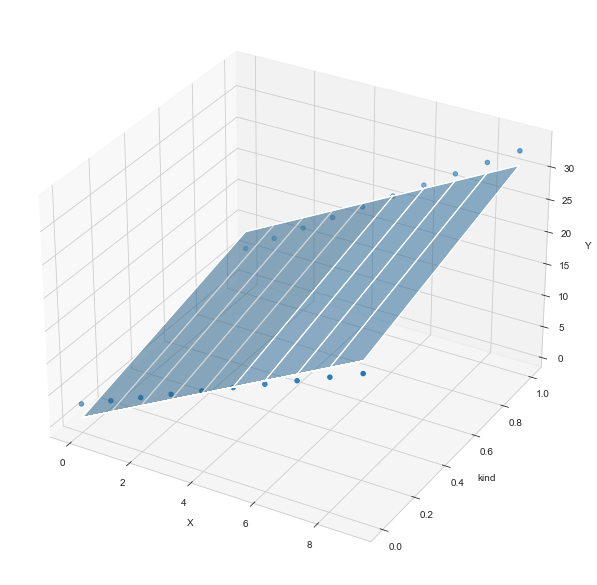

In [2]:
#import python libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#the data base is a .csv file
path="cars_clus.csv"

#trick to get data from google drive
#url = 'https://drive.google.com/file/d/15lXgF-nVPsr9EeyjRYB0yLHbHijXhLMK/view?usp=drive_link'
#file_id=url.split('/')[-2]
#path='https://drive.google.com/uc?id=' + file_id



In [4]:
#read the csv file into the panda dataframe
df = pd.read_csv(path)

In [5]:
#show data frame object
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


## Data has a lot of null values, that are not good to do analysis...
a good approach is to clear the data of this null fields

In [6]:
# clear the data...
# will convert the dataframe into the dataframe cast to numerical values
print ("Shape of dataset before cleaning: ", df.shape)

#select some fields and try to convert them to numeric
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

#drop null values
df = df.dropna()

#will reset the index
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.shape)
df

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0


# Initial analysis on the data





In [7]:
df[['price','manufact']]

,price,manufact
0,21.50,Acura
1,28.40,Acura
2,42.00,Acura
3,23.99,Audi
4,33.95,Audi
...,...,...
112,14.90,Volkswagen
113,16.70,Volkswagen
114,21.20,Volkswagen
115,19.99,Volkswagen


<Axes: title={'center': 'Manufacture vs price'}, xlabel='manufact'>

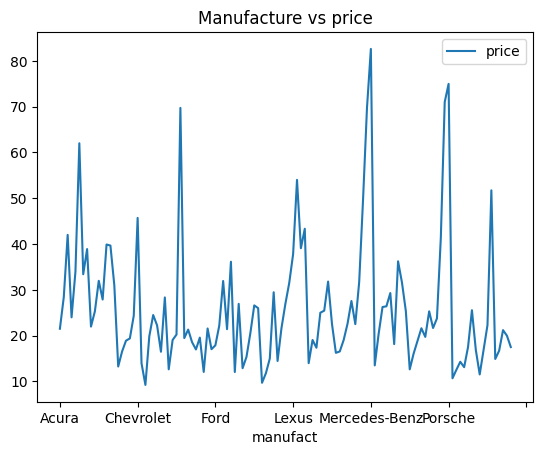

In [8]:
df.plot( x='manufact', y='price', title='Manufacture vs price')

<Axes: title={'center': 'Manufacture vs mpg'}, xlabel='manufact'>

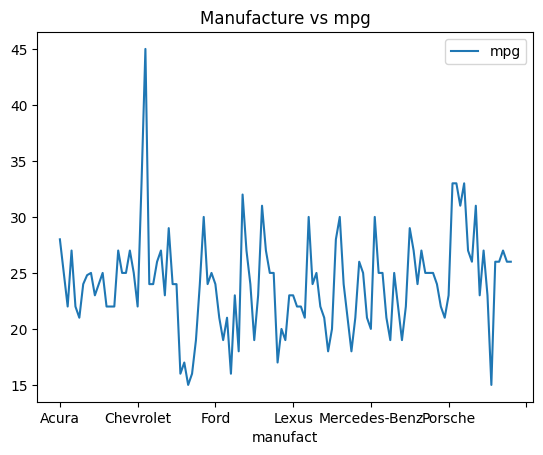

In [9]:
df.plot( x='manufact', y='mpg', title='Manufacture vs mpg')

<Axes: title={'center': 'mpg vs price'}, xlabel='price', ylabel='mpg'>

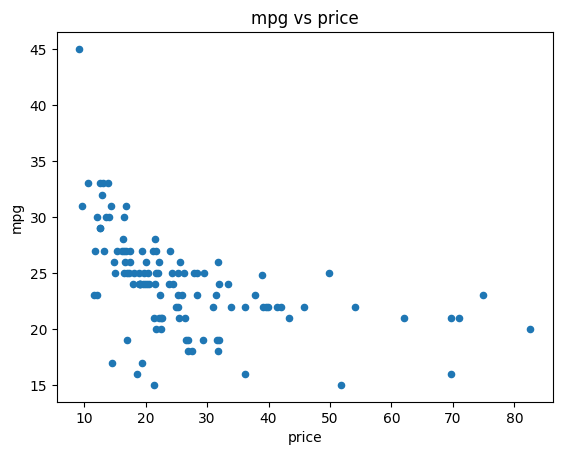

In [10]:
df.plot( x='price', y='mpg', title='mpg vs price', kind='scatter')

In [11]:

#locate the cars with the best mpg price
df.loc[ (df['price'] < 10) & (df['mpg'] >30)]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
22,Chevrolet,Metro,21.855,5.16,0.0,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,3.084,0.0
52,Hyundai,Accent,41.184,5.86,0.0,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,3.718,0.0


___
___
___
# Conditions for the multi variate linear fitting

+ 1) predicted variable and prediction variables (features) should have linear  dependence.

+ 2) features should be independent of each other.

+ 3) Resisual of the fitting should have Gaussian histogram (around zero).

___
___
___

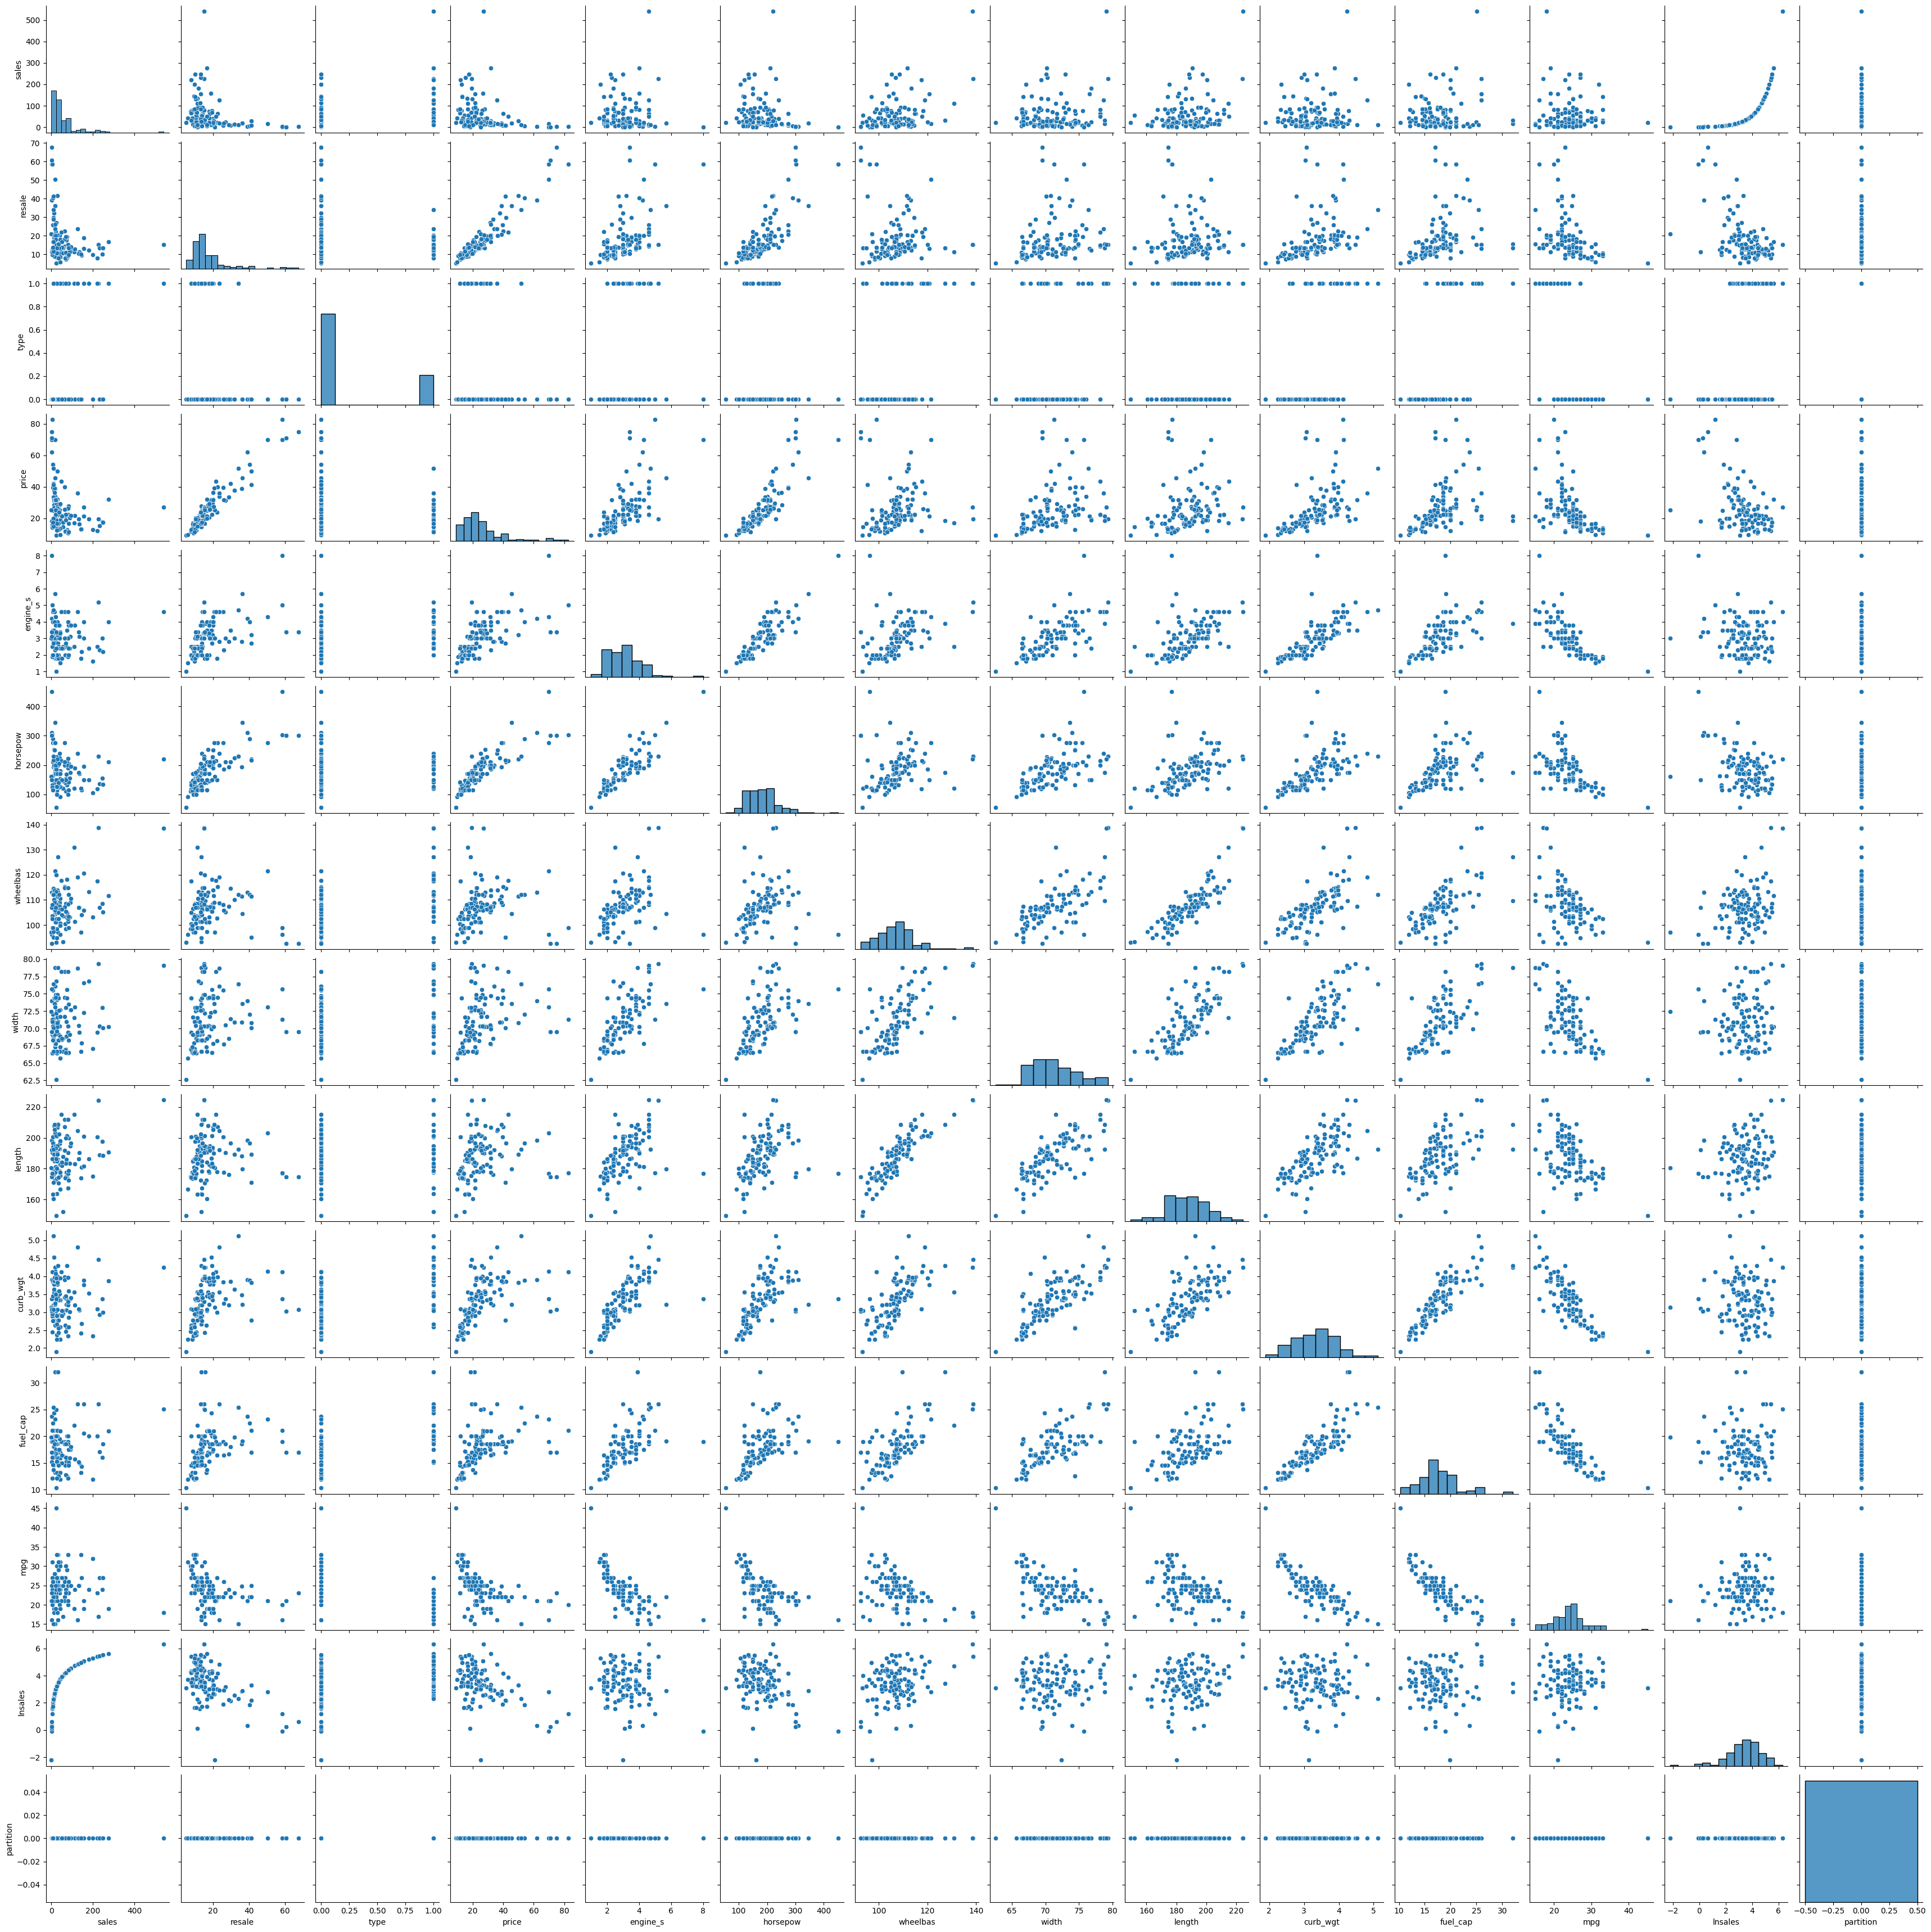

<Figure size 1000x1000 with 0 Axes>

In [12]:
sns.pairplot(df,  kind='scatter')
plt.show()
plt.gcf().set_size_inches(10,10)



### Pearson Correlation

$$ P(x,y) = \frac{\sum_i (x_i-x_m) \sum_j(y_j-y_m)}{\sum_i \sqrt{x_i-x_m)^2} \sum_j\sqrt{(y_j-y_m)^2}} $$

(covariance over standard deviation)
If X and Y are independent random variables, then their covariance is zero.
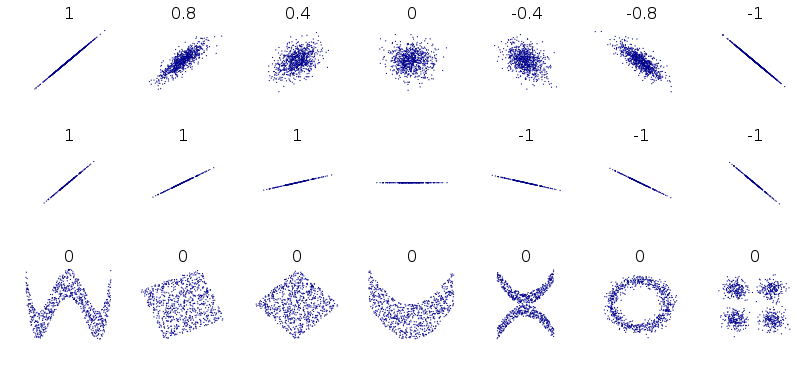

<ipython-input-13-335b44c846d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)


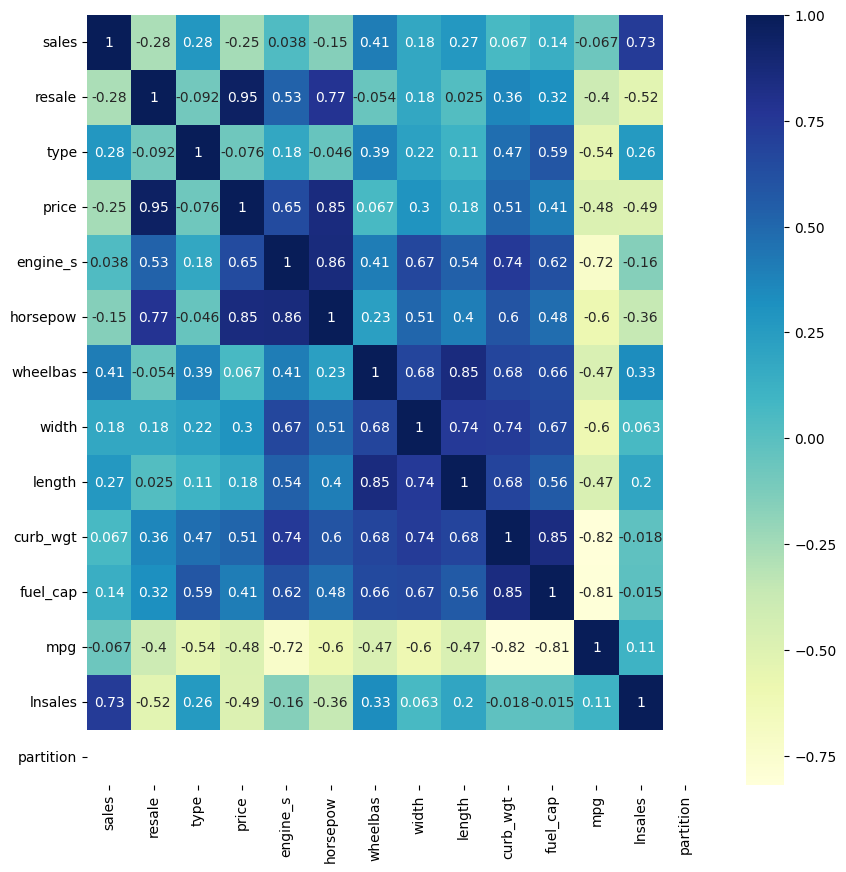

In [13]:
#testing the peason correlation
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.gcf().set_size_inches(10,10)
plt.show()   #where is XlogP?

for example:
+ mpg is inversely correlated to fuel capacity.....this points that for higher mpg more space is need for the motor.

+ Price is correlated to horse power

+ Price is correlated to number of resales

- <p style='color:red'>Price is correlated to engine size, but engine size is correlated to horse power</p>



# Question? Is is possible to predict price, based on the horse power and mpg?

A multilinear fitting should be able to make such prediction


vector X will be all the input (independent variables).
vector Y will be the desired values (dependent variable)

In [16]:
#lets select some of the numerical values...therefore creating a new dataframe

featureset = df[['price', 'horsepow', 'mpg']].copy()
featureset.head()

,price,horsepow,mpg
0,21.50,140.0,28.0
1,28.40,225.0,25.0
2,42.00,210.0,22.0
3,23.99,150.0,27.0
4,33.95,200.0,22.0


Therefore, our model reads:

price(horsepow, mpg) = a + b* horsepow + c* mpg

In [17]:
feature_list = list(featureset.columns[1:])
print(feature_list)
X = featureset[['horsepow','mpg']].values
y = featureset['price'].values

print('X :', X[0:5])
print('y :', y[0:5])

['horsepow', 'mpg']
X : [[140.  28.]
 [225.  25.]
 [210.  22.]
 [150.  27.]
 [200.  22.]]
y : [21.5  28.4  42.   23.99 33.95]


Here comes a trick to fit the data, instead of fitting all the data, and then generate new unknown inputs (X) and see what the prediction will be, we will use part of the data to be the known values, and part of the data to be the unknow values.

We will divide the data into 2 sets:
  + train set, this data we are going to use to fit the actual model (adjust the parameters between X_training (known X) and Y_training (known price).
  + test set, this part of the data we are going to use X_testset (known X) to predict what the values of price is going to be acording to model (ynew). After we can compare the predicted values of ynew to the actual known values of price (y_testset) related to the X_testset.

In [18]:
#split the data into train and test data sets...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #test size is 30%
print ('Trainning set size:', X_train.shape,  y_train.shape)
print ('Test set size:', X_test.shape,  y_test.shape)

Trainning set size: (81, 2) (81,)
Test set size: (36, 2) (36,)


In [19]:
#apply the multilinear model to predic
from sklearn.linear_model import LinearRegression

#creates the model
mlr = LinearRegression()

#train the model
mlr.fit(X_train,y_train)

LinearRegression()

In [20]:
#see the fitted coeficients
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

print('price(x) =',mlr.intercept_,' +',mlr.coef_[0],'* \033[96m',feature_list[0], '\033[00m+', mlr.coef_[1],'*\033[96m', feature_list[1],'\033[00m')

Intercept:  -16.374966681785015
Coefficients: [0.21110095 0.1626256 ]
price(x) = -16.374966681785015  + 0.21110095147423327 *  horsepow + 0.16262559822938258 * mpg 


## Now, lets try to predict the values of price from the test set and compare them with the actual known values

In [21]:
ynew = mlr.predict(X_test)
ynewtrain = mlr.predict(X_train)

In [22]:
#compare the prediction values and the real values

dfResults = pd.DataFrame({'True value':y_test, 'Predicted':ynew, 'Relative Difference':(y_test-ynew)})
#dfy = pd.DataFrame({'True value':y_test, 'Predicted':ypred})

dfResults.head(20)

,True value,Predicted,Relative Difference
0,39.665,45.255558,-5.590558
1,42.000,31.533996,10.466004
2,22.245,30.073489,-7.828489
3,16.535,23.577835,-7.042835
4,24.340,29.910864,-5.570864
5,22.195,29.260361,-7.065361
6,62.000,52.481466,9.518534
7,24.495,22.993008,1.501992
8,82.600,50.630033,31.969967
9,45.705,60.032625,-14.327625


# Correct way to evaluate is to use metrics

### Mean absolute error
$$ MAE = \sum_i^N  | y^{real}_i - y^{pred}_i |$$



### Root mean square error
$$ RMSE = \sum_i^N  \sqrt{ \frac{ y^{real}_i - y^{pred}_i}{N} }$$




### R_squared
$$ R^2 = 1 - \sum_i^N \frac{(y^{real}_i - y^{pred}_i)^2}{(y^{real}_i - y^{mean})^2} $$

In [23]:
 #now use some metrics to see how good is the predictions

from sklearn import metrics
import matplotlib.pyplot as plt
print('\nFor test set')
print("Root mean square error: (zero is optimal)", np.sqrt(metrics.mean_squared_error(y_test, ynew)))
print("Mean absolute error: (zero is optimal)", metrics.mean_absolute_error(y_test, ynew))
print("R2 (1 is optimal): ", metrics.r2_score(y_test, ynew))

print('\nFor training set')
print("Root mean square error: (zero is optimal)", np.sqrt(metrics.mean_squared_error(y_train, ynewtrain)))
print("Mean absolute error: (zero is optimal)", metrics.mean_absolute_error(y_train, ynewtrain))
print("R2 (1 is optimal): ", metrics.r2_score(y_train, ynewtrain))


For test set
Root mean square error: (zero is optimal) 8.599817846193478
Mean absolute error: (zero is optimal) 6.077034897474339
R2 (1 is optimal):  0.7656719734263245

For training set
Root mean square error: (zero is optimal) 6.686532744177693
Mean absolute error: (zero is optimal) 4.642115801296447
R2 (1 is optimal):  0.6661858272648398


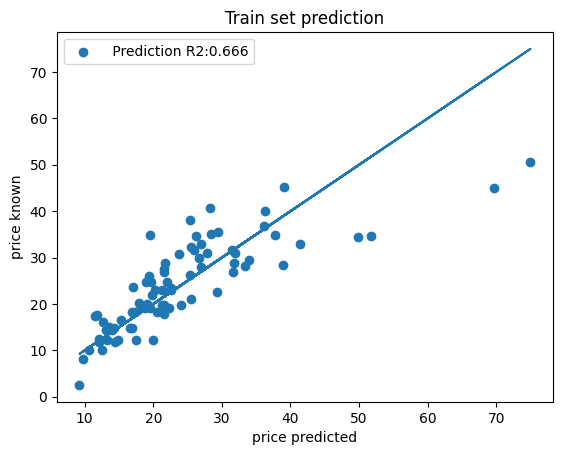

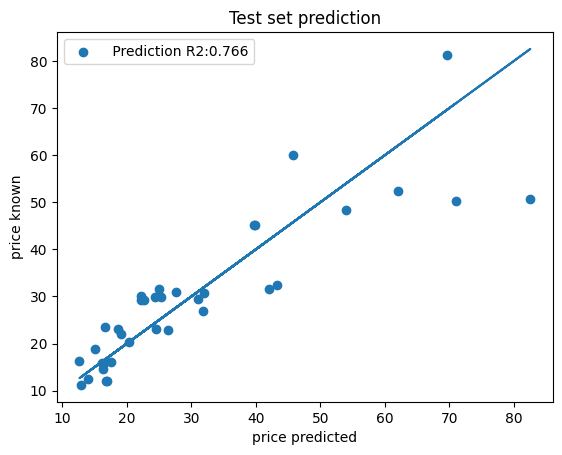

In [24]:
#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_train, ynewtrain, label=' Prediction R2:'+f'{metrics.r2_score(y_train, ynewtrain):.3f}' ) #, c=colors)
plt.plot(y_train, y_train)
plt.xlabel('price predicted')
plt.ylabel('price known')
plt.title('Train set prediction' )
plt.legend()
plt.show()

plt.scatter(y_test, ynew, label=' Prediction R2:'+f'{metrics.r2_score(y_test, ynew):.3f}' ) #, c=colors)
plt.plot(y_test, y_test)
plt.xlabel('price predicted')
plt.ylabel('price known')
plt.title('Test set prediction' )
plt.legend()
plt.show()

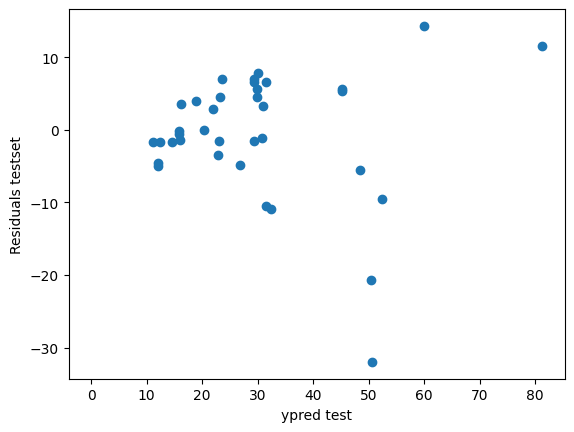

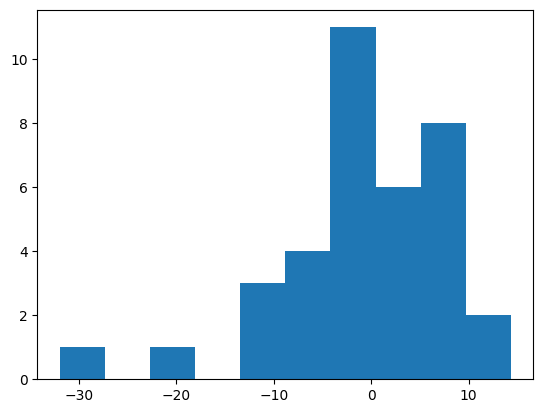

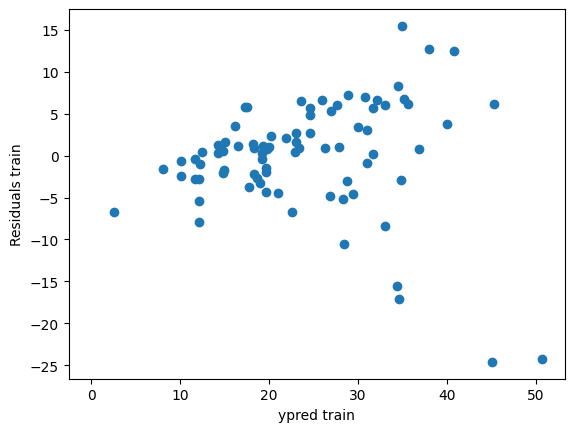

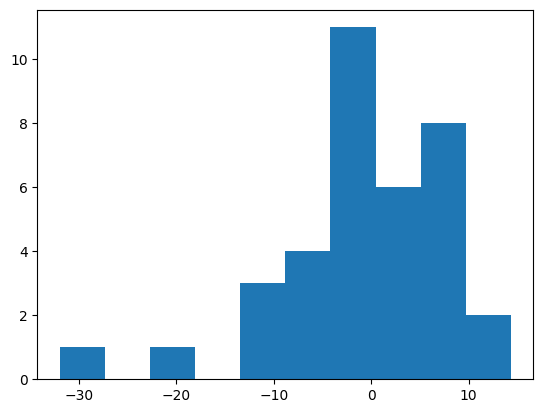

In [25]:
#checking the residuals of the fitting
#checking homoscedaicety
plt.ylabel('Residuals testset')
plt.xlabel('ypred test')
plt.scatter(ynew,ynew-y_test)
plt.plot(0)
plt.show()

#this should follow a gaussian distribution, more points are closer to zero, and errors decay away from zero
plt.hist(ynew-y_test)
plt.show()

#checking the residuals of the fitting
#checking homoscedaicety
plt.ylabel('Residuals train')
plt.xlabel('ypred train')
plt.scatter(ynewtrain,ynewtrain-y_train)
plt.plot(0)
plt.show()

#this should follow a gaussian distribution, more points are closer to zero, and errors decay away from zero
plt.hist(ynew-y_test)
plt.show()


# K-Folding training

Objective: Do different trainings on to extimate average performance.
Divides the into k-folds, in each 'folding' apply the model leaving 1 part of the data as test:

K = 4 folds:

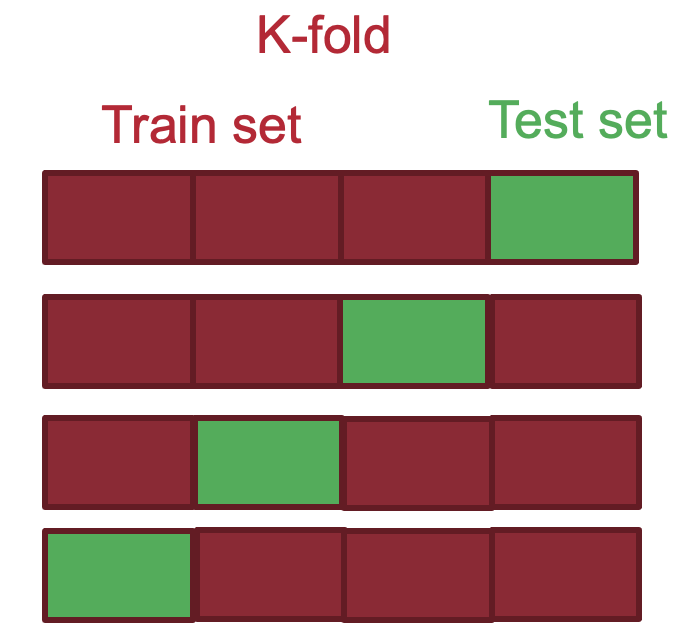



In [26]:
#split the data into train and test data sets...
#K fold magic
# scikit-learn k-fold cross-validation

from sklearn.model_selection import KFold

# prepare cross validation
k= 4
kfold = KFold(n_splits=int(k), random_state=True
              , shuffle=True)
print('k-folds=', int(k), ' number of testset points', len(X)/int(k), ' out of ', len(X) )


k-folds= 4  number of testset points 29.25  out of  117


In [27]:
# enumerate splits
i = -1
Rsquare = np.zeros(4)
for train, test in kfold.split(X):
      i += 1
      #print('train: %s, test: %s' % (X[train], X[test]))
      print('\nFold: ',i)

      X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]


      #apply the multilinear model to predic
      mlr = LinearRegression()
      mlr.fit(X_train,y_train)

      #see the fitted coeficients
      #print("Intercept: ", mlr.intercept_)
      #print("Coefficients:",mlr.coef_)



      #prediction
      ypred = mlr.predict(X_test)
      ypredtrain = mlr.predict(X_train)


      #Model Evaluation test set
      meanAbErr = metrics.mean_absolute_error(y_test, ypred)
      rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, ypred))
      R2testset = metrics.r2_score(y_test, ypred)
      Rsquare[i] = R2testset

      print('Testset')
      print('R squared: ', R2testset) #how many points fall on the prediction line
      print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
      print('Root Mean Square Error:', rootMeanSqErr)



      #Model Evaluation train set
      meanAbErrTrain = metrics.mean_absolute_error(y_train, ypredtrain )
      rootMeanSqErrTrain = np.sqrt(metrics.mean_squared_error(y_train, ypredtrain))
      R2train = metrics.r2_score(y_train, ypredtrain)
      #print('\ntraining')
      #print('R squared: ', R2train) #how many points fall on the prediction line
      #print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
      #print('Root Mean Square Error:', rootMeanSqErr)

print('\n------>  Average of 4 R-squared:', Rsquare.mean())


Fold:  0
Testset
R squared:  0.7681483057386383
Mean Absolute Error: 5.31030867732865
Root Mean Square Error: 6.990611047693251

Fold:  1
Testset
R squared:  0.6411075593629132
Mean Absolute Error: 6.199511345406845
Root Mean Square Error: 9.609183956820226

Fold:  2
Testset
R squared:  0.7207094621005153
Mean Absolute Error: 4.640412021027467
Root Mean Square Error: 5.971236310607167

Fold:  3
Testset
R squared:  0.7109234649741241
Mean Absolute Error: 5.306297232675899
Root Mean Square Error: 7.430325406234189

------>  Average of 4 R-squared: 0.7102221980440477


___
## Comparison linear fit and multi variate linear fitting

In [28]:
from sklearn.linear_model import LinearRegression

Xline =  np.array([i[0] for i in X_train])
model = LinearRegression().fit(Xline.reshape((-1, 1)), y_train)

print('Single variable linear fitting')
print('Price= ',model.intercept_,' + ', model.coef_,' * ', feature_list[0])

Xline =  np.array([i[1] for i in X_train])
model = LinearRegression().fit(Xline.reshape((-1, 1)), y_train)

print('Price= ',model.intercept_,' + ', model.coef_,' * ', feature_list[1])
print('\n\n')
print('Multi variable linear fitting')
print('price(x) =',mlr.intercept_,' +',mlr.coef_[0],'* \033[96m',feature_list[0], '\033[00m+', mlr.coef_[1],'*\033[96m', feature_list[1],'\033[00m')

Single variable linear fitting
Price=  -12.173283170256529  +  [0.21272549]  *  horsepow
Price=  58.808591520565656  +  [-1.38291634]  *  mpg



Multi variable linear fitting
price(x) = -20.843352131551807  + 0.22534563855921874 *  horsepow + 0.26820473579117277 * mpg 
